In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from functools import partial
import numpy as np

In [50]:
passthrough = pd.read_csv("final_df/h14_short.csv")
reflected = pd.read_csv("final_df/ref.csv")

In [51]:
passthrough["Region"].value_counts()

I      70
III    31
II     25
Name: Region, dtype: int64

In [52]:
passthrough["x"] = passthrough["x"]*0.0115065*10
passthrough["y"] = passthrough["y"]*0.0115065*10
passthrough["time"] = passthrough["time"]*1e-3

reflected["x"] = reflected["x"]*0.0115065*10
reflected["y"] = reflected["y"]*0.0115065*10
reflected["time"] = reflected["time"]*1e-3

### Passthrough


In [53]:
region_3 = passthrough[passthrough["Region"] == "III"]
region_1 = passthrough[(passthrough["Region"] == "I")|(passthrough["Region"] == "O")]
# region_1["Region"] = "I"

In [54]:
region_1["Region"].value_counts()

I    70
Name: Region, dtype: int64

In [55]:
X1 = region_1["x"].values
x01 = X1[0]
Y1 = region_1["y"].values
y01 = Y1[0]
t1 = region_1["time"].values
offset1 = t1[0]
tbar1 = t1 - offset1

X3 = region_3["x"].values
x03 = X3[0]
Y3 = region_3["y"].values
y03 = Y3[0]
t3 = region_3["time"].values
offset3 = t3[0]
tbar3 = t3 - offset3



In [56]:
def the_parabola_to_fit(x, m, a, x0, y0):
    second_term = (m) * (x - x0)
    third_term = a * ((x - x0) ** 2)
    return y0 + second_term + third_term


def parametric_x_to_fit(t, vx0, x0):
    return x0 + vx0 * t


def parametric_y_to_fit(t, vy0, g, y0):
    return y0 + vy0 * t + 0.5 * g * t**2


In [57]:
the_parabola1 = partial(the_parabola_to_fit, x0=x01, y0=y01)
parametric_x1 = partial(parametric_x_to_fit, x0=x01)
parametric_y1 = partial(parametric_y_to_fit, y0=y01)
the_parabola_vector1 = np.vectorize(the_parabola1)
parametric_x_vector1 = np.vectorize(parametric_x1)
parametric_y_vector1 = np.vectorize(parametric_y1)

In [58]:
popt1, pcov1 = curve_fit(the_parabola1, X1, Y1)
popty1, pcovy1 = curve_fit(parametric_y1, tbar1, Y1)
poptx1, pcovx1 = curve_fit(parametric_x1, tbar1, X1)
popt1, popty1, poptx1

(array([-26.81627697,  13.08665663]),
 array([   16.65769123, 10068.87322915]),
 array([-8.28319905]))

In [59]:
the_parabola3 = partial(the_parabola_to_fit, x0=x03, y0=y03)
parametric_x3 = partial(parametric_x_to_fit, x0=x03)
parametric_y3 = partial(parametric_y_to_fit, y0=y03)
the_parabola_vector3 = np.vectorize(the_parabola3)
parametric_x_vector3 = np.vectorize(parametric_x3)
parametric_y_vector3 = np.vectorize(parametric_y3)

In [60]:
popt3, pcov3 = curve_fit(the_parabola3, X3, Y3)
popty3, pcovy3 = curve_fit(parametric_y3, tbar3, Y3)
poptx3, pcovx3 = curve_fit(parametric_x3, tbar3, X3)
popt3, popty3, poptx3

(array([0.02367513, 0.02620853]),
 array([  24.17218716, 7928.8268946 ]),
 array([420.02680176]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


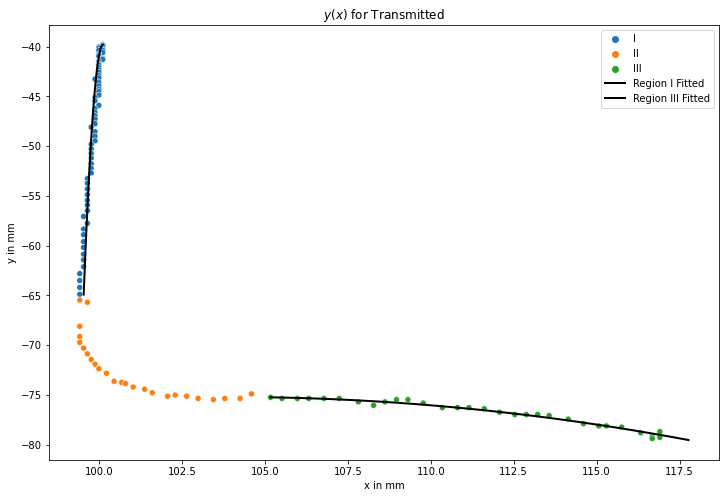

In [61]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y=-passthrough["y"], data=passthrough, hue = "Region")
plt.plot(parametric_x_vector1(tbar1, *poptx1), -parametric_y_vector1(tbar1, *popty1), "k", label="Region I Fitted", linewidth=2)
plt.plot(parametric_x_vector3(tbar3, *poptx3), -parametric_y_vector3(tbar3, *popty3), "k", label="Region III Fitted", linewidth=2)
plt.legend()
plt.xlabel("x in mm")
plt.ylabel("y in mm")
plt.title("$y(x)$ for Transmitted")
plt.savefig("temp/y_x_transmitted.eps", format='eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


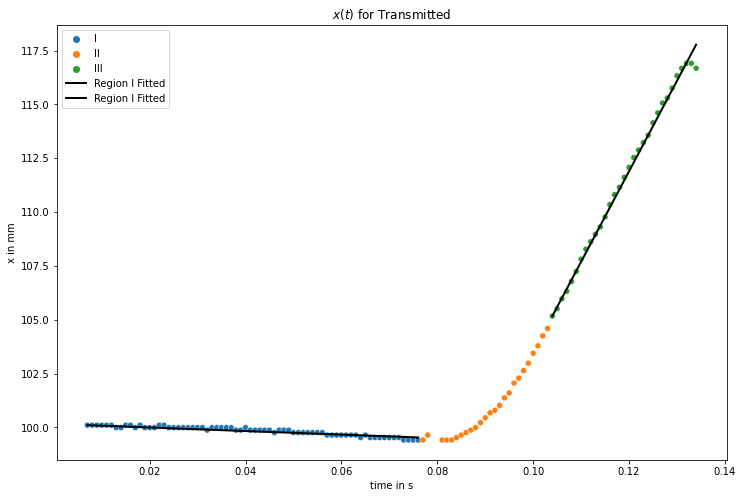

In [62]:
plt.figure(figsize=(12, 8))
sns.scatterplot(y="x", x="time", data=passthrough, hue = "Region")
plt.plot(t1, parametric_x_vector1(tbar1, *poptx1),  "k", label="Region I Fitted", linewidth=2)
plt.plot(t3, parametric_x_vector3(tbar3, *poptx3),  "k", label="Region I Fitted", linewidth=2)
plt.legend()
plt.xlabel("time in s")
plt.ylabel("x in mm")
plt.title("$x(t)$ for Transmitted")
plt.savefig("temp/x_t_transmitted.eps", format='eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


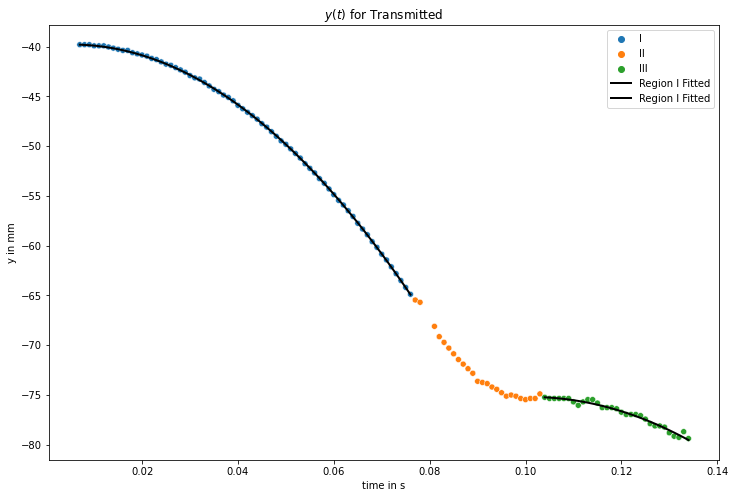

In [63]:
plt.figure(figsize=(12, 8))
sns.scatterplot(y=-passthrough["y"], x="time", data=passthrough, hue = "Region")
plt.plot(t1, -parametric_y_vector1(tbar1, *popty1),  "k", label="Region I Fitted", linewidth=2)
plt.plot(t3, -parametric_y_vector3(tbar3, *popty3),  "k", label="Region I Fitted", linewidth=2)
plt.legend()
plt.xlabel("time in s")
plt.ylabel("y in mm")
plt.title("$y(t)$ for Transmitted")
plt.savefig("temp/y_t_transmitted.eps", format='eps', dpi=300)

### Transmitted


In [73]:
region_3 = reflected[reflected["Region"] == "III"]
region_1 = reflected[(reflected["Region"] == "I")]
# region_1["Region"] = "I"

In [74]:
X1 = region_1["x"].values
x01 = X1[0]
Y1 = region_1["y"].values
y01 = Y1[0]
t1 = region_1["time"].values
offset1 = t1[0]
tbar1 = t1 - offset1

X3 = region_3["x"].values
x03 = X3[0]
Y3 = region_3["y"].values
y03 = Y3[0]
t3 = region_3["time"].values
offset3 = t3[0]
tbar3 = t3 - offset3



In [75]:
def the_parabola_to_fit(x, m, a, x0, y0):
    second_term = (m) * (x - x0)
    third_term = a * ((x - x0) ** 2)
    return y0 + second_term + third_term


def parametric_x_to_fit(t, vx0, x0):
    return x0 + vx0 * t


def parametric_y_to_fit(t, vy0, g, y0):
    return y0 + vy0 * t + 0.5 * g * t**2


In [76]:
the_parabola1 = partial(the_parabola_to_fit, x0=x01, y0=y01)
parametric_x1 = partial(parametric_x_to_fit, x0=x01)
parametric_y1 = partial(parametric_y_to_fit, y0=y01)
the_parabola_vector1 = np.vectorize(the_parabola1)
parametric_x_vector1 = np.vectorize(parametric_x1)
parametric_y_vector1 = np.vectorize(parametric_y1)

In [77]:
popt1, pcov1 = curve_fit(the_parabola1, X1, Y1)
popty1, pcovy1 = curve_fit(parametric_y1, tbar1, Y1)
poptx1, pcovx1 = curve_fit(parametric_x1, tbar1, X1)
popt1, popty1, poptx1

(array([-34.91468173,  14.48366152]),
 array([  16.61177007, 9814.12004812]),
 array([-5.71978304]))

In [78]:
the_parabola3 = partial(the_parabola_to_fit, x0=x03, y0=y03)
parametric_x3 = partial(parametric_x_to_fit, x0=x03)
parametric_y3 = partial(parametric_y_to_fit, y0=y03)
the_parabola_vector3 = np.vectorize(the_parabola3)
parametric_x_vector3 = np.vectorize(parametric_x3)
parametric_y_vector3 = np.vectorize(parametric_y3)

In [79]:
popt3, pcov3 = curve_fit(the_parabola3, X3, Y3)
popty3, pcovy3 = curve_fit(parametric_y3, tbar3, Y3)
poptx3, pcovx3 = curve_fit(parametric_x3, tbar3, X3)
popt3, popty3, poptx3

(array([-0.52754421,  0.01695952]),
 array([ -290.41786016, 10229.94839153]),
 array([546.14004988]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


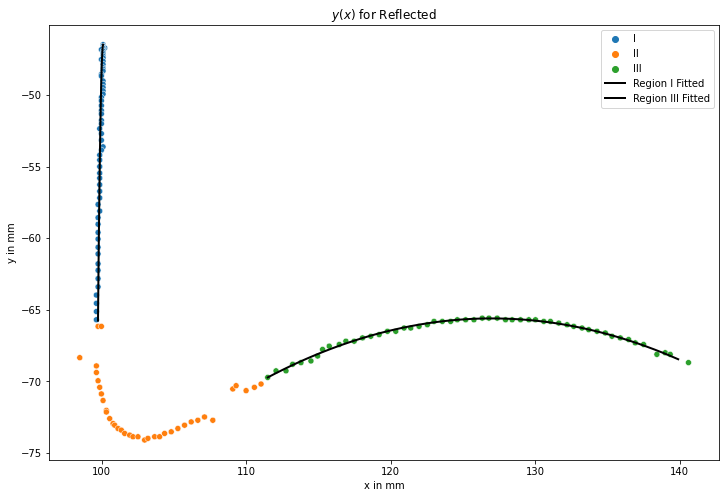

In [80]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y=-reflected["y"], data=reflected, hue = "Region")
plt.plot(parametric_x_vector1(tbar1, *poptx1), -parametric_y_vector1(tbar1, *popty1), "k", label="Region I Fitted", linewidth=2)
plt.plot(parametric_x_vector3(tbar3, *poptx3), -parametric_y_vector3(tbar3, *popty3), "k", label="Region III Fitted", linewidth=2)
plt.legend()
plt.xlabel("x in mm")
plt.ylabel("y in mm")
plt.title("$y(x)$ for Reflected")
plt.savefig("temp/y_x_reflected.eps", format='eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


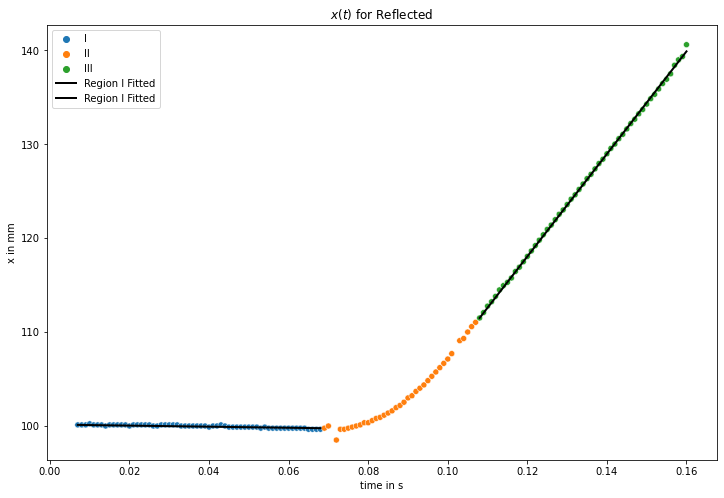

In [81]:
plt.figure(figsize=(12, 8))
sns.scatterplot(y="x", x="time", data=reflected, hue = "Region")
plt.plot(t1, parametric_x_vector1(tbar1, *poptx1),  "k", label="Region I Fitted", linewidth=2)
plt.plot(t3, parametric_x_vector3(tbar3, *poptx3),  "k", label="Region I Fitted", linewidth=2)
plt.legend()
plt.xlabel("time in s")
plt.ylabel("x in mm")
plt.title("$x(t)$ for Reflected")
plt.savefig("temp/x_t_reflected.eps", format='eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


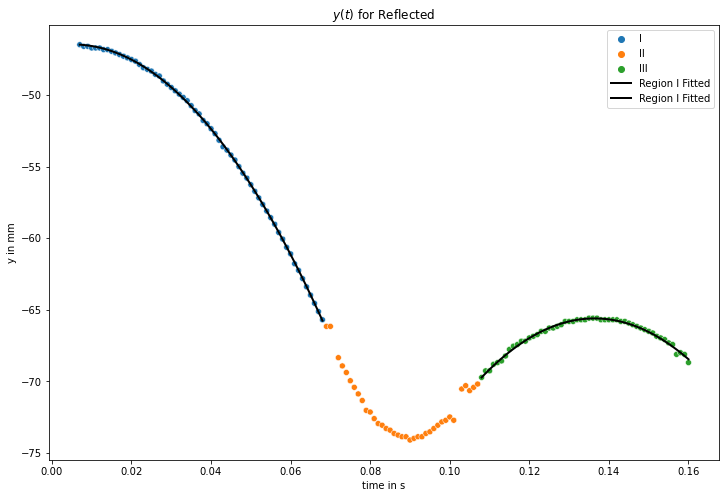

In [82]:
plt.figure(figsize=(12, 8))
sns.scatterplot(y=-reflected["y"], x="time", data=reflected, hue = "Region")
plt.plot(t1, -parametric_y_vector1(tbar1, *popty1),  "k", label="Region I Fitted", linewidth=2)
plt.plot(t3, -parametric_y_vector3(tbar3, *popty3),  "k", label="Region I Fitted", linewidth=2)
plt.legend()
plt.xlabel("time in s")
plt.ylabel("y in mm")
plt.title("$y(t)$ for Reflected")
plt.savefig("temp/y_t_reflected.eps", format='eps', dpi=300)